In [1]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
import numpy as np
import pandas
import math
import tensorflow as tf
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import LSTM
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras.layers import *
from tensorflow.python.keras.models import *
from tensorflow.python.keras.optimizers import *
from sklearn.metrics import mean_squared_error
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras.layers.convolutional import Conv3D
from tensorflow.python.keras.layers.convolutional_recurrent import ConvLSTM2D
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.callbacks import EarlyStopping
stop = EarlyStopping(monitor='val_loss',min_delta = 0.001,patience=60,verbose = 0)


def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t - %d)' % (j + 1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

def SMAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + y_pred +1))) * 100

def MASE(training_series, testing_series, prediction_series):
    n = training_series.shape[0]
    d = np.abs(  np.diff( training_series) ).sum()/(n-1)
    errors = np.abs(testing_series - prediction_series )
    return errors.mean()/d

def RMSE(y_actual,y_predicted):
    rms = sqrt(mean_squared_error(y_actual, y_predicted))
    return rms

import keras.backend as K
def WeightedLoss1(y_true,y_pred):
    diff = K.abs((y_true - y_pred) / K.clip(K.abs(y_true+y_pred+1),K.epsilon(),None))
    wsum = (K.mean(K.square(y_pred - y_true), axis=-1))+ (K.mean(K.abs(y_pred - y_true), axis=-1))+ (100.*K.mean(diff, axis=-1))
    return wsum/3
    

def WeightedLoss2(y_true,y_pred):
    diff = K.square((y_true - y_pred) / K.clip(K.square(y_true+y_pred+1),K.epsilon(),None))
    wsum = (K.mean(K.square(y_pred - y_true), axis=-1))+ (K.mean(K.square(y_pred - y_true), axis=-1))+ (100.*K.mean(diff, axis=-1))
    return wsum/3


Using TensorFlow backend.


In [ ]:
modelfit_1:
('from full mase errors', 0.24591046111960357)
('from full smape errors', 19.37203619857892)
('from full rmse errors', 1.4731057022716558)

In [2]:
frame_height_width = 3
X_frames = np.zeros((740,1440,frame_height_width,frame_height_width,1))
Y_frames = np.zeros((740,1440,frame_height_width,frame_height_width,1))
for outer_counter in range(740):
    loop = 0
    filename = "training_example_"+str(outer_counter+1)+".csv"
    dataset = read_csv(filename,header = 0)
    dataset.drop(dataset.columns[[0]],axis =1 ,inplace = True)
    dataset = dataset.append(dataset.iloc[np.shape(dataset)[0]-1,:])
    dataset.sort_index(inplace=True) 
    values = dataset.values
    values = values.astype('float32')
    df = pandas.DataFrame(values)
    reframed = series_to_supervised(df, 1, 1)
    for counter in range(0,(np.shape(dataset)[0])-1,frame_height_width):
        loopset = reframed.iloc[counter:counter+frame_height_width,:] 
        values = loopset.values.astype('float32')
        X_frames[outer_counter,loop,:,:,0] = values[:,:frame_height_width]
        Y_frames[outer_counter,loop,:,:,0] = values[:,frame_height_width:]
        loop = loop+1
    
print(np.shape(X_frames))
print(np.shape(Y_frames))

(740, 1440, 3, 3, 1)
(740, 1440, 3, 3, 1)


rerunloop:0


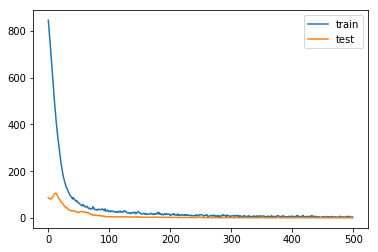

('from full mase errors', 0.7211649195987774)
('from full smape errors', 92.46265033127582)
('from full rmse errors', 2.8856041944099364)
('from full mase errors 1:50', 0.1817672539935565)
('from full smape errors 1:50', 45.2728544856655)
('from full rmse errors 1:50', 3.9504102033802844)
('from full mase errors -50:', 6.522437572171371)
('from full smape errors -50:', 487.1060053170479)
('from full rmse errors -50:', 3.1314606261932063)
rerunloop:1


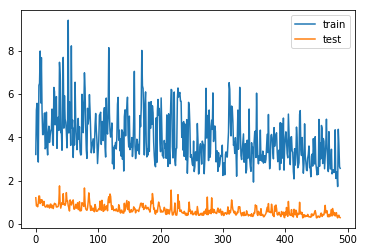

('from full mase errors', 0.5309261610183408)
('from full smape errors', 38.59572796902413)
('from full rmse errors', 2.758708307311403)
('from full mase errors 1:50', 0.15291414249495763)
('from full smape errors 1:50', 79.87076813512175)
('from full rmse errors 1:50', 3.807890061679805)
('from full mase errors -50:', 4.52428335154491)
('from full smape errors -50:', 99.05859935765979)
('from full rmse errors -50:', 2.8163345310033923)
rerunloop:2


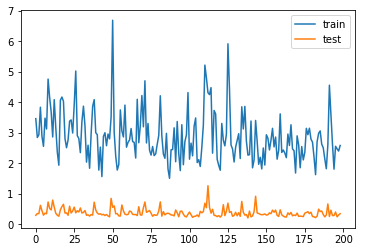

('from full mase errors', 0.6232076580802153)
('from full smape errors', 42.29226970318261)
('from full rmse errors', 3.2177259970653167)
('from full mase errors 1:50', 0.279751668118691)
('from full smape errors 1:50', 43.127905903007125)
('from full rmse errors 1:50', 5.053570392592643)
('from full mase errors -50:', 4.240840595042021)
('from full smape errors -50:', 89.13047116944908)
('from full rmse errors -50:', 2.7829445831397583)
rerunloop:3


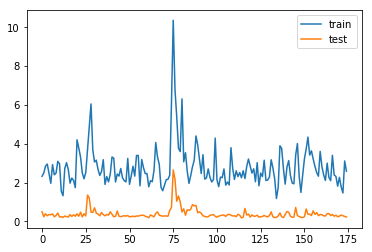

('from full mase errors', 0.4625464167406859)
('from full smape errors', 117.37213786138285)
('from full rmse errors', 2.635667026879853)
('from full mase errors 1:50', 0.1528874926409634)
('from full smape errors 1:50', 151.45305301940127)
('from full rmse errors 1:50', 3.2243799405442055)
('from full mase errors -50:', 3.7164497340440783)
('from full smape errors -50:', 54.69316855143071)
('from full rmse errors -50:', 2.708333585704976)
rerunloop:4


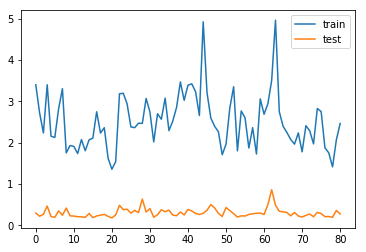

('from full mase errors', 0.5224982097632545)
('from full smape errors', 30.293144918151153)
('from full rmse errors', 2.727522875210874)
('from full mase errors 1:50', 0.18976736266060645)
('from full smape errors 1:50', 38.095153057775306)
('from full rmse errors 1:50', 3.5210504355251766)
('from full mase errors -50:', 3.7791712868247664)
('from full smape errors -50:', 115.55708527528417)
('from full rmse errors -50:', 2.621726487839842)
rerunloop:5


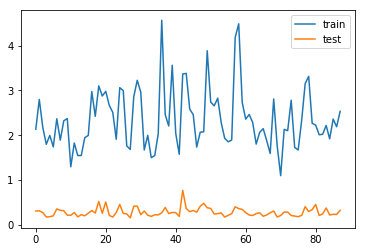

('from full mase errors', 0.5981280613931063)
('from full smape errors', 77.54361905514853)
('from full rmse errors', 3.2416986219534834)
('from full mase errors 1:50', 0.3022496506715316)
('from full smape errors 1:50', 73.24943484329906)
('from full rmse errors 1:50', 4.803936020037886)
('from full mase errors -50:', 3.6940248197869527)
('from full smape errors -50:', 110.14748345028353)
('from full rmse errors -50:', 2.680902871199874)
rerunloop:6


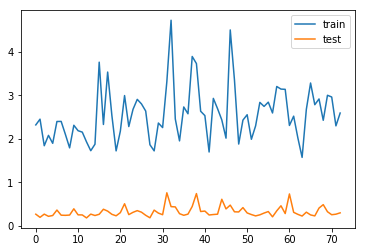

('from full mase errors', 0.4956863244045427)
('from full smape errors', 25.214668731367436)
('from full rmse errors', 2.5519338863819248)
('from full mase errors 1:50', 0.1730379825076525)
('from full smape errors 1:50', 28.20614964739407)
('from full rmse errors 1:50', 3.545744397288854)
('from full mase errors -50:', 4.1240056083447065)
('from full smape errors -50:', 117.26212032034826)
('from full rmse errors -50:', 2.5919825470536235)
rerunloop:7


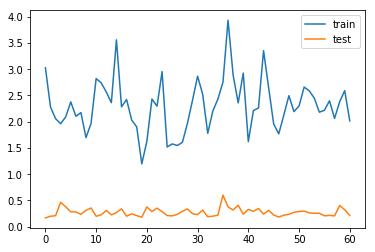

('from full mase errors', 0.5096595521577116)
('from full smape errors', 27.759154298466978)
('from full rmse errors', 2.5807181739173095)
('from full mase errors 1:50', 0.1661003806988951)
('from full smape errors 1:50', 47.9215275799102)
('from full rmse errors 1:50', 3.4174444912720534)
('from full mase errors -50:', 4.103330327660214)
('from full smape errors -50:', 125.51997747623368)
('from full rmse errors -50:', 2.6470090353056746)
rerunloop:8


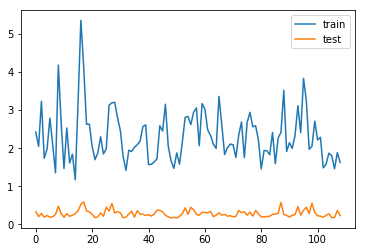

('from full mase errors', 0.5087725172787434)
('from full smape errors', 28.660417766380103)
('from full rmse errors', 2.3531354248692327)
('from full mase errors 1:50', 0.13106041267834878)
('from full smape errors 1:50', 26.75651944181795)
('from full rmse errors 1:50', 2.861266190505681)
('from full mase errors -50:', 4.7208133739682445)
('from full smape errors -50:', 55.38496358746801)
('from full rmse errors -50:', 2.48692219552848)
rerunloop:9


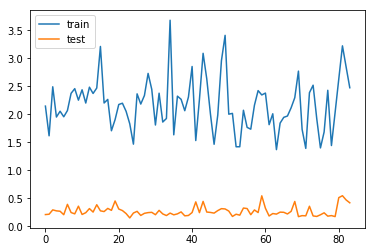

('from full mase errors', 0.5959265935277454)
('from full smape errors', 25.03256298816217)
('from full rmse errors', 2.5185202700626577)
('from full mase errors 1:50', 0.1721342325342538)
('from full smape errors 1:50', 24.720149523456193)
('from full rmse errors 1:50', 3.5581115932113714)
('from full mase errors -50:', 5.8323510871236515)
('from full smape errors -50:', 96.34524716274163)
('from full rmse errors -50:', 2.6210729841201323)


In [3]:
n_train_hours = np.shape(X_frames)[1]-24
train_x,train_y = X_frames[:,:n_train_hours,:,:,:], Y_frames[:,:n_train_hours,:,:,:]
test_x,test_y = X_frames[:,n_train_hours:,:,:,:], Y_frames[:,n_train_hours:,:,:,:]

seq = Sequential()
seq.add(ConvLSTM2D(filters=8, kernel_size=(3, 3),
                   input_shape=(None, frame_height_width, frame_height_width, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())
seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='linear',
               padding='same', data_format='channels_last'))
seq.compile(loss='mse', optimizer='adam')
maselist = []
smapelist = []
rmselist = []
for rerunloop in range(10):
        print("rerunloop:"+ str(rerunloop))
        history = seq.fit(train_x, train_y, batch_size=70, epochs=500, validation_split=0.1, verbose = 0, callbacks = [stop])   
        pyplot.plot(history.history['loss'], label='train')
        pyplot.plot(history.history['val_loss'], label='test')
        pyplot.legend()
        pyplot.show()
        pred = seq.predict(test_x)
        seq.save("/home/neema/Research_i7_v2_temp/convlstm/errors/"+str(rerunloop)+"_modelfit_5_b70_e500.h5")

        fromfull_mase_errors = []
        fromfull_smape_errors = []
        fromfull_rmse_errors = []
        for counter in range(np.shape(X_frames)[0]):
            y_hat = pred[counter,:,1,1,0] 
            y = test_y[counter,:,1,1,0]
            y_train = train_x[counter,:,1,1,0]
            mase = MASE(y_train,y,y_hat)
            smape = SMAPE(y,y_hat)
            rmse = RMSE(y,y_hat)
            fromfull_mase_errors.append(mase)
            fromfull_smape_errors.append(smape)
            fromfull_rmse_errors.append(rmse)

        #np.savetxt("/home/neema/Research_i7_v2_temp/convlstm/errors/mase_"+str(rerunloop)+".csv", np.array(fromfull_mase_errors), fmt='%10.3f',delimiter = ",")
        #np.savetxt("/home/neema/Research_i7_v2_temp/convlstm/errors/smape_"+str(rerunloop)+".csv", np.array(fromfull_smape_errors), fmt='%10.3f',delimiter = ",")
        #np.savetxt("/home/neema/Research_i7_v2_temp/convlstm/errors/rmse_"+str(rerunloop)+".csv", np.array(fromfull_rmse_errors), fmt='%10.3f',delimiter = ",")

        maselist.append(fromfull_mase_errors)
        smapelist.append(fromfull_smape_errors)
        rmselist.append(fromfull_rmse_errors)

        print('from full mase errors', np.asarray(fromfull_mase_errors).mean())
        print('from full smape errors', np.asarray(fromfull_smape_errors).mean())
        print('from full rmse errors', np.asarray(fromfull_rmse_errors).mean())
        print('from full mase errors 1:50', np.asarray(fromfull_mase_errors)[1:50].mean())
        print('from full smape errors 1:50', np.asarray(fromfull_smape_errors)[1:50].mean())
        print('from full rmse errors 1:50', np.asarray(fromfull_rmse_errors)[1:50].mean())
        print('from full mase errors -50:', np.asarray(fromfull_mase_errors)[-50:].mean())
        print('from full smape errors -50:', np.asarray(fromfull_smape_errors)[-50:].mean())
        print('from full rmse errors -50:', np.asarray(fromfull_rmse_errors)[-50:].mean())
maselist_array = np.array(maselist)
smapelist_array = np.array(smapelist)
rmselist_array = np.array(rmselist)
np.savetxt("/home/neema/Research_i7_v2_temp/convlstm/errors/mase_1.csv", maselist_array, fmt='%10.3f',delimiter = ",")
np.savetxt("/home/neema/Research_i7_v2_temp/convlstm/errors/smape_1.csv", smapelist_array, fmt='%10.3f',delimiter = ",")
np.savetxt("/home/neema/Research_i7_v2_temp/convlstm/errors/rmse_1.csv", rmselist_array, fmt='%10.3f',delimiter = ",")


rerunloop:0


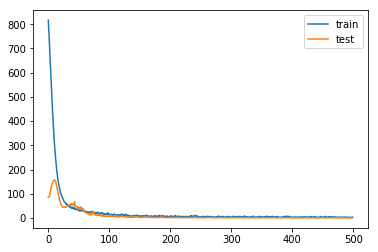

('from full mase errors', 0.7197896834112567)
('from full smape errors', 98.49389721891639)
('from full rmse errors', 2.8262445572828856)
('from full mase errors 1:50', 0.26422918314364496)
('from full smape errors 1:50', 109.85545859700615)
('from full rmse errors 1:50', 4.4476721423052705)
('from full mase errors -50:', 5.822283496178501)
('from full smape errors -50:', 107.08755775409041)
('from full rmse errors -50:', 2.8915262148201997)
rerunloop:1


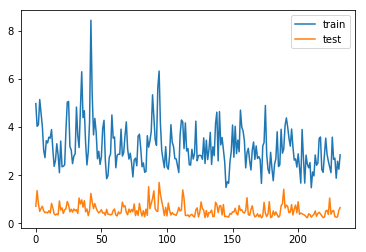

('from full mase errors', 0.7097901495035759)
('from full smape errors', 48.719995082976595)
('from full rmse errors', 3.191529492894324)
('from full mase errors 1:50', 0.3579897023741265)
('from full smape errors 1:50', 24.524582935442112)
('from full rmse errors 1:50', 5.312063914606588)
('from full mase errors -50:', 3.764952922404948)
('from full smape errors -50:', 57.886286959837086)
('from full rmse errors -50:', 1.939424438797175)
rerunloop:2


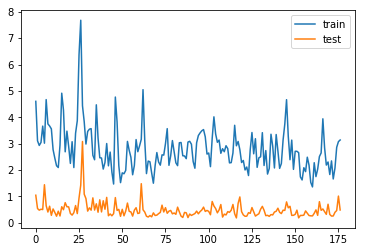

('from full mase errors', 0.4796967607752187)
('from full smape errors', 244.48440289731292)
('from full rmse errors', 1.9506404528321188)
('from full mase errors 1:50', 0.1413811747386195)
('from full smape errors 1:50', 21.79039015407523)
('from full rmse errors 1:50', 2.930162945617623)
('from full mase errors -50:', 4.089203719902725)
('from full smape errors -50:', 1911.679074027114)
('from full rmse errors -50:', 1.793552282329946)
rerunloop:3


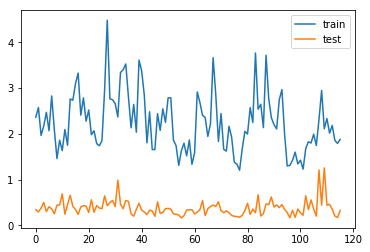

('from full mase errors', 0.4555650734566699)
('from full smape errors', 64.97495158634636)
('from full rmse errors', 2.7375279192404665)
('from full mase errors 1:50', 0.3079481862688446)
('from full smape errors 1:50', 23.55602449148966)
('from full rmse errors 1:50', 4.931664210750596)
('from full mase errors -50:', 2.0920425025357856)
('from full smape errors -50:', 76.83569050774952)
('from full rmse errors -50:', 1.5992506179087203)
rerunloop:4


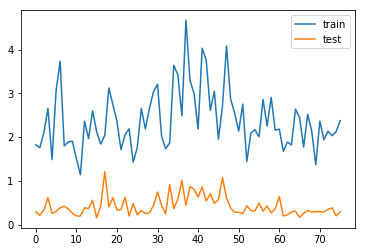

('from full mase errors', 0.5180972273390846)
('from full smape errors', 68.04646159779902)
('from full rmse errors', 3.069657623247614)
('from full mase errors 1:50', 0.3685155293067268)
('from full smape errors 1:50', 22.115041378193744)
('from full rmse errors 1:50', 5.770792117165196)
('from full mase errors -50:', 1.9483583877553659)
('from full smape errors -50:', 31.879141888926586)
('from full rmse errors -50:', 1.540948647042744)
rerunloop:5


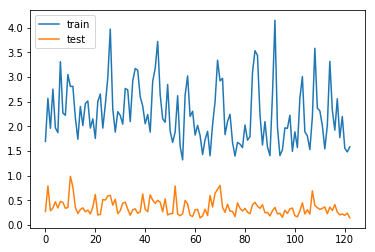

('from full mase errors', 0.28060049271769016)
('from full smape errors', 129.15984829503776)
('from full rmse errors', 1.7445869582058746)
('from full mase errors 1:50', 0.14069503861711377)
('from full smape errors 1:50', 50.067654545597655)
('from full rmse errors 1:50', 2.8502118040134654)
('from full mase errors -50:', 1.6873417095812662)
('from full smape errors -50:', 32.15109986287784)
('from full rmse errors -50:', 1.3450449729967624)
rerunloop:6


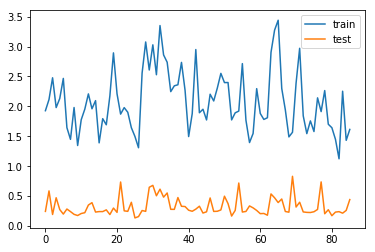

('from full mase errors', 0.54745782832116)
('from full smape errors', 126.16741851633611)
('from full rmse errors', 2.8130454076567735)
('from full mase errors 1:50', 0.33173799929985953)
('from full smape errors 1:50', 32.197870813203565)
('from full rmse errors 1:50', 5.138492047687939)
('from full mase errors -50:', 2.4438905142481766)
('from full smape errors -50:', 45.169361030171785)
('from full rmse errors -50:', 1.393561281810168)
rerunloop:7


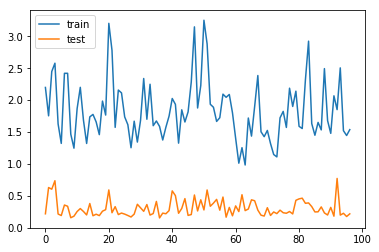

('from full mase errors', 0.3433395930648009)
('from full smape errors', 54.81192156497342)
('from full rmse errors', 1.726862473447589)
('from full mase errors 1:50', 0.15214151943774498)
('from full smape errors 1:50', 26.606845515247745)
('from full rmse errors 1:50', 2.6872246348228006)
('from full mase errors -50:', 2.0526023654207965)
('from full smape errors -50:', 155.32860098482408)
('from full rmse errors -50:', 1.274968429515018)
rerunloop:8


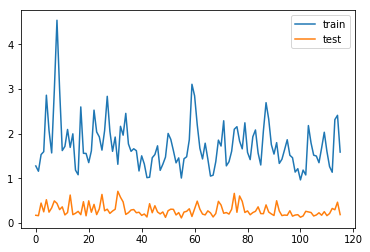

('from full mase errors', 0.2742598639786611)
('from full smape errors', 33.132610529685714)
('from full rmse errors', 1.4930182303688386)
('from full mase errors 1:50', 0.14417917620475917)
('from full smape errors 1:50', 19.945323976069602)
('from full rmse errors 1:50', 2.6531745574138377)
('from full mase errors -50:', 1.7185692248873787)
('from full smape errors -50:', 39.375679650652586)
('from full rmse errors -50:', 1.0553389100965154)
rerunloop:9


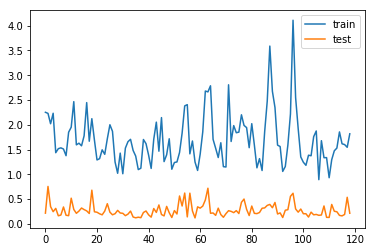

('from full mase errors', 0.27896871374774235)
('from full smape errors', 32.05365640621734)
('from full rmse errors', 1.2470513187203454)
('from full mase errors 1:50', 0.09679908553603123)
('from full smape errors 1:50', 12.13221242028879)
('from full rmse errors 1:50', 2.0918288441545214)
('from full mase errors -50:', 2.071570556140449)
('from full smape errors -50:', 46.20333230364649)
('from full rmse errors -50:', 1.0818350500227363)


In [15]:
n_train_hours = np.shape(X_frames)[1]-24
train_x,train_y = X_frames[:,:n_train_hours,:,:,:], Y_frames[:,:n_train_hours,:,:,:]
test_x,test_y = X_frames[:,n_train_hours:,:,:,:], Y_frames[:,n_train_hours:,:,:,:]

seq = Sequential()
seq.add(ConvLSTM2D(filters=16, kernel_size=(3, 3),
                   input_shape=(None, frame_height_width, frame_height_width, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())
seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='linear',
               padding='same', data_format='channels_last'))
seq.compile(loss='mse', optimizer='adam')
maselist = []
smapelist = []
rmselist = []
for rerunloop in range(10):
        print("rerunloop:"+ str(rerunloop))
        history = seq.fit(train_x, train_y, batch_size=70, epochs=500, validation_split=0.1, verbose = 0, callbacks = [stop])   
        pyplot.plot(history.history['loss'], label='train')
        pyplot.plot(history.history['val_loss'], label='test')
        pyplot.legend()
        pyplot.show()
        pred = seq.predict(test_x)
        seq.save("/home/neema/Research_i7_v2_temp/convlstm/errors/"+str(rerunloop)+"_modelfit_4_b70_e500.h5")

        fromfull_mase_errors = []
        fromfull_smape_errors = []
        fromfull_rmse_errors = []
        for counter in range(np.shape(X_frames)[0]):
            y_hat = pred[counter,:,1,1,0] 
            y = test_y[counter,:,1,1,0]
            y_train = train_x[counter,:,1,1,0]
            mase = MASE(y_train,y,y_hat)
            smape = SMAPE(y,y_hat)
            rmse = RMSE(y,y_hat)
            fromfull_mase_errors.append(mase)
            fromfull_smape_errors.append(smape)
            fromfull_rmse_errors.append(rmse)

        np.savetxt("/home/neema/Research_i7_v2_temp/convlstm/errors/mase_"+str(rerunloop)+".csv", np.array(fromfull_mase_errors), fmt='%10.3f',delimiter = ",")
        np.savetxt("/home/neema/Research_i7_v2_temp/convlstm/errors/smape_"+str(rerunloop)+".csv", np.array(fromfull_smape_errors), fmt='%10.3f',delimiter = ",")
        np.savetxt("/home/neema/Research_i7_v2_temp/convlstm/errors/rmse_"+str(rerunloop)+".csv", np.array(fromfull_rmse_errors), fmt='%10.3f',delimiter = ",")

        maselist.append(fromfull_mase_errors)
        smapelist.append(fromfull_smape_errors)
        rmselist.append(fromfull_rmse_errors)

        print('from full mase errors', np.asarray(fromfull_mase_errors).mean())
        print('from full smape errors', np.asarray(fromfull_smape_errors).mean())
        print('from full rmse errors', np.asarray(fromfull_rmse_errors).mean())
        print('from full mase errors 1:50', np.asarray(fromfull_mase_errors)[1:50].mean())
        print('from full smape errors 1:50', np.asarray(fromfull_smape_errors)[1:50].mean())
        print('from full rmse errors 1:50', np.asarray(fromfull_rmse_errors)[1:50].mean())
        print('from full mase errors -50:', np.asarray(fromfull_mase_errors)[-50:].mean())
        print('from full smape errors -50:', np.asarray(fromfull_smape_errors)[-50:].mean())
        print('from full rmse errors -50:', np.asarray(fromfull_rmse_errors)[-50:].mean())
maselist_array = np.array(maselist)
smapelist_array = np.array(smapelist)
rmselist_array = np.array(rmselist)
np.savetxt("/home/neema/Research_i7_v2_temp/convlstm/errors/mase.csv", maselist_array, fmt='%10.3f',delimiter = ",")
np.savetxt("/home/neema/Research_i7_v2_temp/convlstm/errors/smape.csv", smapelist_array, fmt='%10.3f',delimiter = ",")
np.savetxt("/home/neema/Research_i7_v2_temp/convlstm/errors/rmse.csv", rmselist_array, fmt='%10.3f',delimiter = ",")
